<div style="width: 100%; margin: 0 auto;">
    <a href="https://github.com/e10101/learning-operations-research">
        <img src="../assets/banner.svg" alt="Learning Operations Research" style="width: 100%; height: auto; display: block;">
    </a>
</div>

# Minimum Spanning Tree (MST) - Prim Algorithm
---

[![Github](../assets/badges/github.svg)](https://github.com/e10101/learning-operations-research)
[![Bilibili](../assets/badges/bilibili.svg)](https://www.bilibili.com/video/BV1MKdDYMEYg/)


## Create Graph

In [1]:
import networkx as nx

In [2]:
n = 7
G = nx.complete_graph(n)

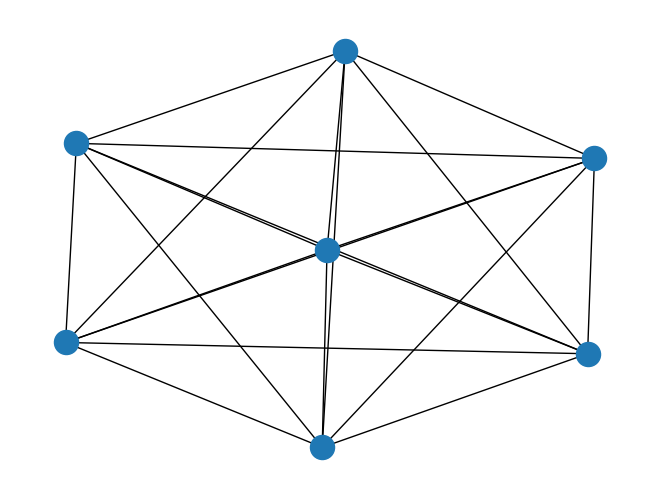

In [3]:
nx.draw(G)

## Create Positions

In [4]:
import random
random.seed(412)

node_pos = {i: (random.random(), random.random()) for i in range(n)}
node_pos

{0: (0.287485695366838, 0.7104741468198333),
 1: (0.0580333404729646, 0.9947687625728054),
 2: (0.11432784272625618, 0.1917743575935109),
 3: (0.1953941544050074, 0.47713398189152945),
 4: (0.07178464233813753, 0.6979459611820233),
 5: (0.3522304140706385, 0.9327051484913186),
 6: (0.5107762162039668, 0.6500261891739658)}

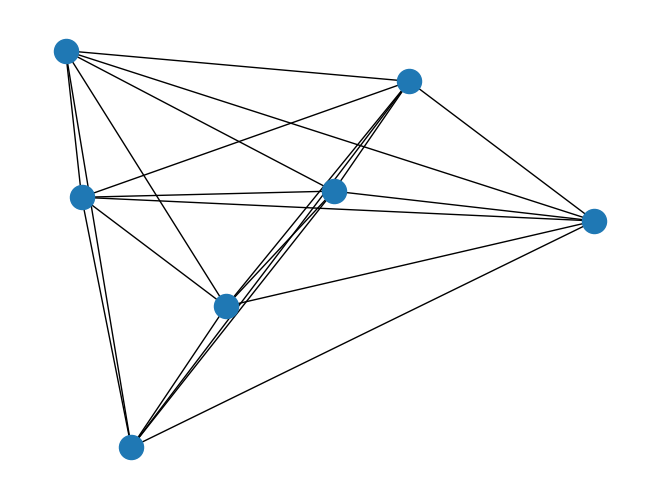

In [5]:
nx.draw(G, pos=node_pos)

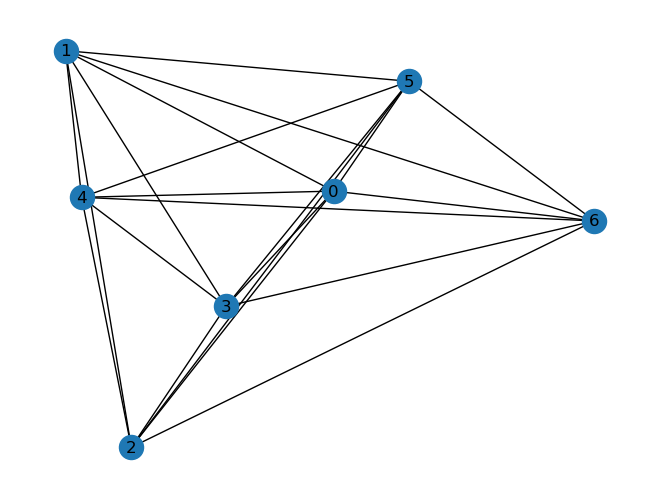

In [6]:
nx.draw(G, pos=node_pos, labels={i: i for i in range(n)})

## Set Weights

In [7]:
import math

def distance(pos1, pos2):
    return math.sqrt((pos1[0] - pos2[0])**2 + (pos1[1] - pos2[1])**2)

In [8]:
distance(node_pos[0], node_pos[1])

0.3653379417915337

In [9]:
for (n1, n2) in G.edges:
    G.edges[(n1, n2)]['distance'] = distance(node_pos[n1], node_pos[n2])

In [10]:
for (n1, n2) in G.edges:
    dist = G.edges[(n1, n2)]['distance']
    print(f'The distance from {n1} to {n2} is {dist}')

The distance from 0 to 1 is 0.3653379417915337
The distance from 0 to 2 is 0.546839202393655
The distance from 0 to 3 is 0.25085550519271566
The distance from 0 to 4 is 0.21606457301710913
The distance from 0 to 5 is 0.23147029335088753
The distance from 0 to 6 is 0.23132793233691618
The distance from 1 to 2 is 0.8049652696930453
The distance from 1 to 3 is 0.5355499597376756
The distance from 1 to 4 is 0.29714116801355345
The distance from 1 to 5 is 0.30067226394579677
The distance from 1 to 6 is 0.5690549652176247
The distance from 2 to 3 is 0.29665107798338225
The distance from 2 to 4 is 0.5079563132579709
The distance from 2 to 5 is 0.7781876832440358
The distance from 2 to 6 is 0.6059422860140757
The distance from 3 to 4 is 0.2530558074251511
The distance from 3 to 5 is 0.4818118929447447
The distance from 3 to 6 is 0.35966312049410293
The distance from 4 to 5 is 0.3657344759641328
The distance from 4 to 6 is 0.4415992600475029
The distance from 5 to 6 is 0.3241051764702966


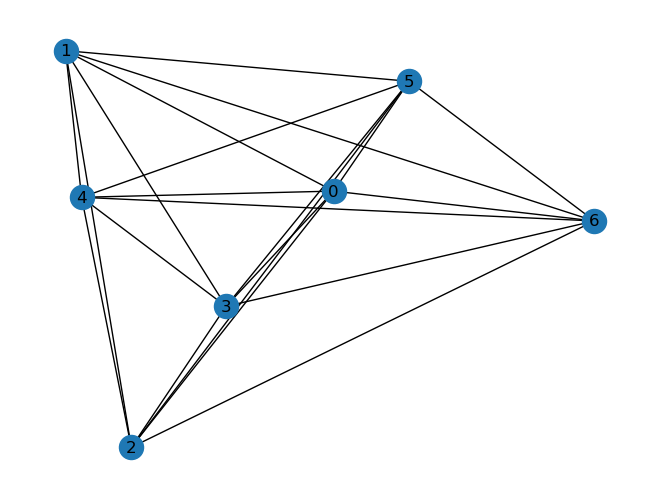

In [11]:
nx.draw(G, pos=node_pos, labels={i: i for i in range(n)})

## Prim Algorithm

In [12]:
selected_edges = []
selected_nodes = [5]

while len(selected_nodes) < len(G.nodes):
    shortest_edge = None
    shortest_weight = 100
    
    for node in selected_nodes:
        neighbors = G.neighbors(node)
    
        for neighbor in neighbors:
            if neighbor not in selected_nodes:
                dist = G.edges[(node, neighbor)]['distance']
                if dist < shortest_weight:
                    shortest_weight = dist
                    shortest_edge = (node, neighbor)
    
    selected_nodes.append(shortest_edge[1])
    selected_edges.append(shortest_edge)
    
    print(f'shortest_edge: {shortest_edge}, shortest_weight: {shortest_weight}')

shortest_edge: (5, 0), shortest_weight: 0.23147029335088753
shortest_edge: (0, 4), shortest_weight: 0.21606457301710913
shortest_edge: (0, 6), shortest_weight: 0.23132793233691618
shortest_edge: (0, 3), shortest_weight: 0.25085550519271566
shortest_edge: (3, 2), shortest_weight: 0.29665107798338225
shortest_edge: (4, 1), shortest_weight: 0.29714116801355345


In [13]:
for node in list(G.neighbors(5)):
    print(f'The distance from 5 to {node} is {G.edges[(5, node)]["distance"]}')

The distance from 5 to 0 is 0.23147029335088753
The distance from 5 to 1 is 0.30067226394579677
The distance from 5 to 2 is 0.7781876832440358
The distance from 5 to 3 is 0.4818118929447447
The distance from 5 to 4 is 0.3657344759641328
The distance from 5 to 6 is 0.3241051764702966


## Result

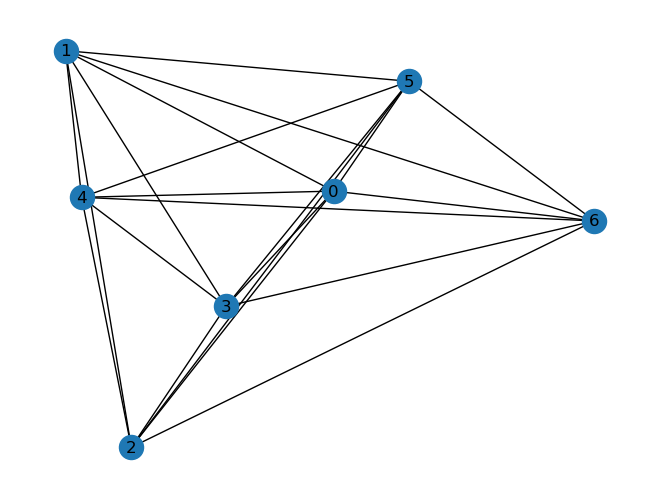

In [14]:
nx.draw(G, pos=node_pos, labels={i: i for i in range(n)})

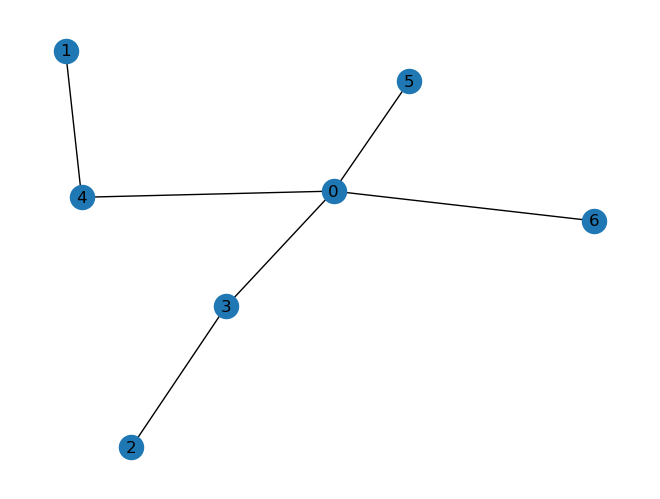

In [15]:
nx.draw(G, pos=node_pos, edgelist=selected_edges, labels={i: i for i in range(n)})